In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.8f}'.format

### kmeans에 대한 원리를 이해하고 실제 거리 기반이라는 것을 확인했다.
- Why kmeans 부터 시작을 하는가?
- 알고리즘에서 가장 쉽고 이해가 빠른 것이 이런 거리기반으로 진행하는 것들 
- 다른 알고리즘과 다르게 거리기반이라는 것을 이해하면 새로운 알고리즘을 배울 때 우리 고민하고 과제를 했던 방식을 기반으로
- 원리를 이해하려고 하면 다른 알고리즘도 쉽게 이해가 될 것

In [6]:
df = pd.read_csv('wine_test.csv')

In [7]:
df.columns

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [8]:
df_sp=df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]

In [10]:
df_sp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23000000,1.71000000,2.43000000,15.60000000,127,2.80000000,3.06000000,0.28000000,2.29000000,5.64000000,1.04000000,3.92000000,1065
1,NaN,1.78000000,2.14000000,11.20000000,100,2.65000000,2.76000000,0.26000000,1.28000000,4.38000000,1.05000000,3.40000000,1050
2,13.16000000,2.36000000,2.67000000,18.60000000,101,2.80000000,3.24000000,0.30000000,2.81000000,5.68000000,1.03000000,3.17000000,1185
3,14.37000000,1.95000000,2.50000000,16.80000000,113,3.85000000,3.49000000,0.24000000,2.18000000,7.80000000,0.86000000,3.45000000,1480
4,13.24000000,2.59000000,2.87000000,21.00000000,118,2.80000000,2.69000000,0.39000000,1.82000000,4.32000000,1.04000000,2.93000000,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71000000,5.65000000,2.45000000,20.50000000,95,1.68000000,0.61000000,0.52000000,1.06000000,7.70000000,0.64000000,1.74000000,740
174,13.40000000,3.91000000,2.48000000,23.00000000,102,1.80000000,0.75000000,0.43000000,1.41000000,7.30000000,0.70000000,1.56000000,750
175,13.27000000,4.28000000,2.26000000,20.00000000,120,1.59000000,0.69000000,0.43000000,1.35000000,10.20000000,0.59000000,1.56000000,835
176,13.17000000,2.59000000,2.37000000,20.00000000,120,1.65000000,0.68000000,0.53000000,1.46000000,9.30000000,0.60000000,1.62000000,840


- 군집에 대한 형성의 기준
- 어떤 기준으로 잘 군집이 형성되었는지 확인할 수 있는가?
- 기준점, 즉 잘한 척도 ( 기준이 될 수 있는 )
- 군집에 대한 평가를 하기 위해선 크게 3가지 정도를 확인하면 좋다. (k-means 기반)
- 1. 시각화를 해야 한다. (군집이 없는 상태 즉 정답이  없는 상태에서 데이터대한 분포를 확인해야 한다. )
- 그럼 분포에 대해서 어떤 변수를 사용해야 하는가 ? 
- 2. 엘보우 함수 이용
- 3. 실루엣 계수 이용 

- 총 이 3가지를 기반으로 군집에 대한 기준과 개수를 정할 수 있다.

In [11]:
from sklearn.preprocessing import StandardScaler

In [19]:
df_sp.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_sp)
pd.DataFrame(df_scaled)
df_sc_sp = pd.DataFrame(df_scaled, columns = df_sp.columns)

In [22]:
df_sc_sp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.52631422,-0.57089554,0.20782113,-1.19769648,2.01151122,0.81544853,1.03169609,-0.66103228,1.25092179,0.22015342,0.35811132,1.85100599,1.00875071
1,0.18121398,0.00419091,1.08079750,-0.29067213,0.11072931,0.81544853,1.21048004,-0.50249579,2.17042222,0.23737493,0.31483426,0.79757125,1.38822501
2,1.70230865,-0.35855593,0.46243924,-0.83488674,0.98801327,2.49296666,1.45879109,-0.97810527,1.05641209,1.15011528,-0.42087570,1.19085355,2.32109935
3,0.28178222,0.20768304,1.80827782,0.43494735,1.35354825,0.81544853,0.66419574,0.21091843,0.41983488,-0.34815661,0.35811132,0.46047214,-0.03480364
4,1.48860113,-0.52665812,0.28056916,-1.31863306,0.91490627,1.56633760,1.35946667,-0.18542280,0.68507538,0.69805049,0.40138837,0.34810576,2.22623077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.87262064,2.91501312,0.28056916,0.28377662,-0.32791267,-0.97390415,-1.40175215,1.24140564,-0.92405036,1.10706149,-1.37297095,-1.21097765,-0.01899221
167,0.48291870,1.37555092,0.38969121,1.03963025,0.18383631,-0.78218779,-1.26269797,0.52799142,-0.30515584,0.93484633,-1.11330861,-1.46380198,0.01263065
168,0.31949531,1.70290782,-0.41053713,0.13260590,1.49976225,-1.11769142,-1.32229262,0.52799142,-0.41125204,2.18340624,-1.58935623,-1.46380198,0.28142495
169,0.19378501,0.20768304,-0.01042296,0.13260590,1.49976225,-1.02183324,-1.33222506,1.32067389,-0.21674234,1.79592213,-1.54607917,-1.37952720,0.29723638


### 시각화를 어떻게 할 것인가?
- 데이터 분포에 대한 시각화

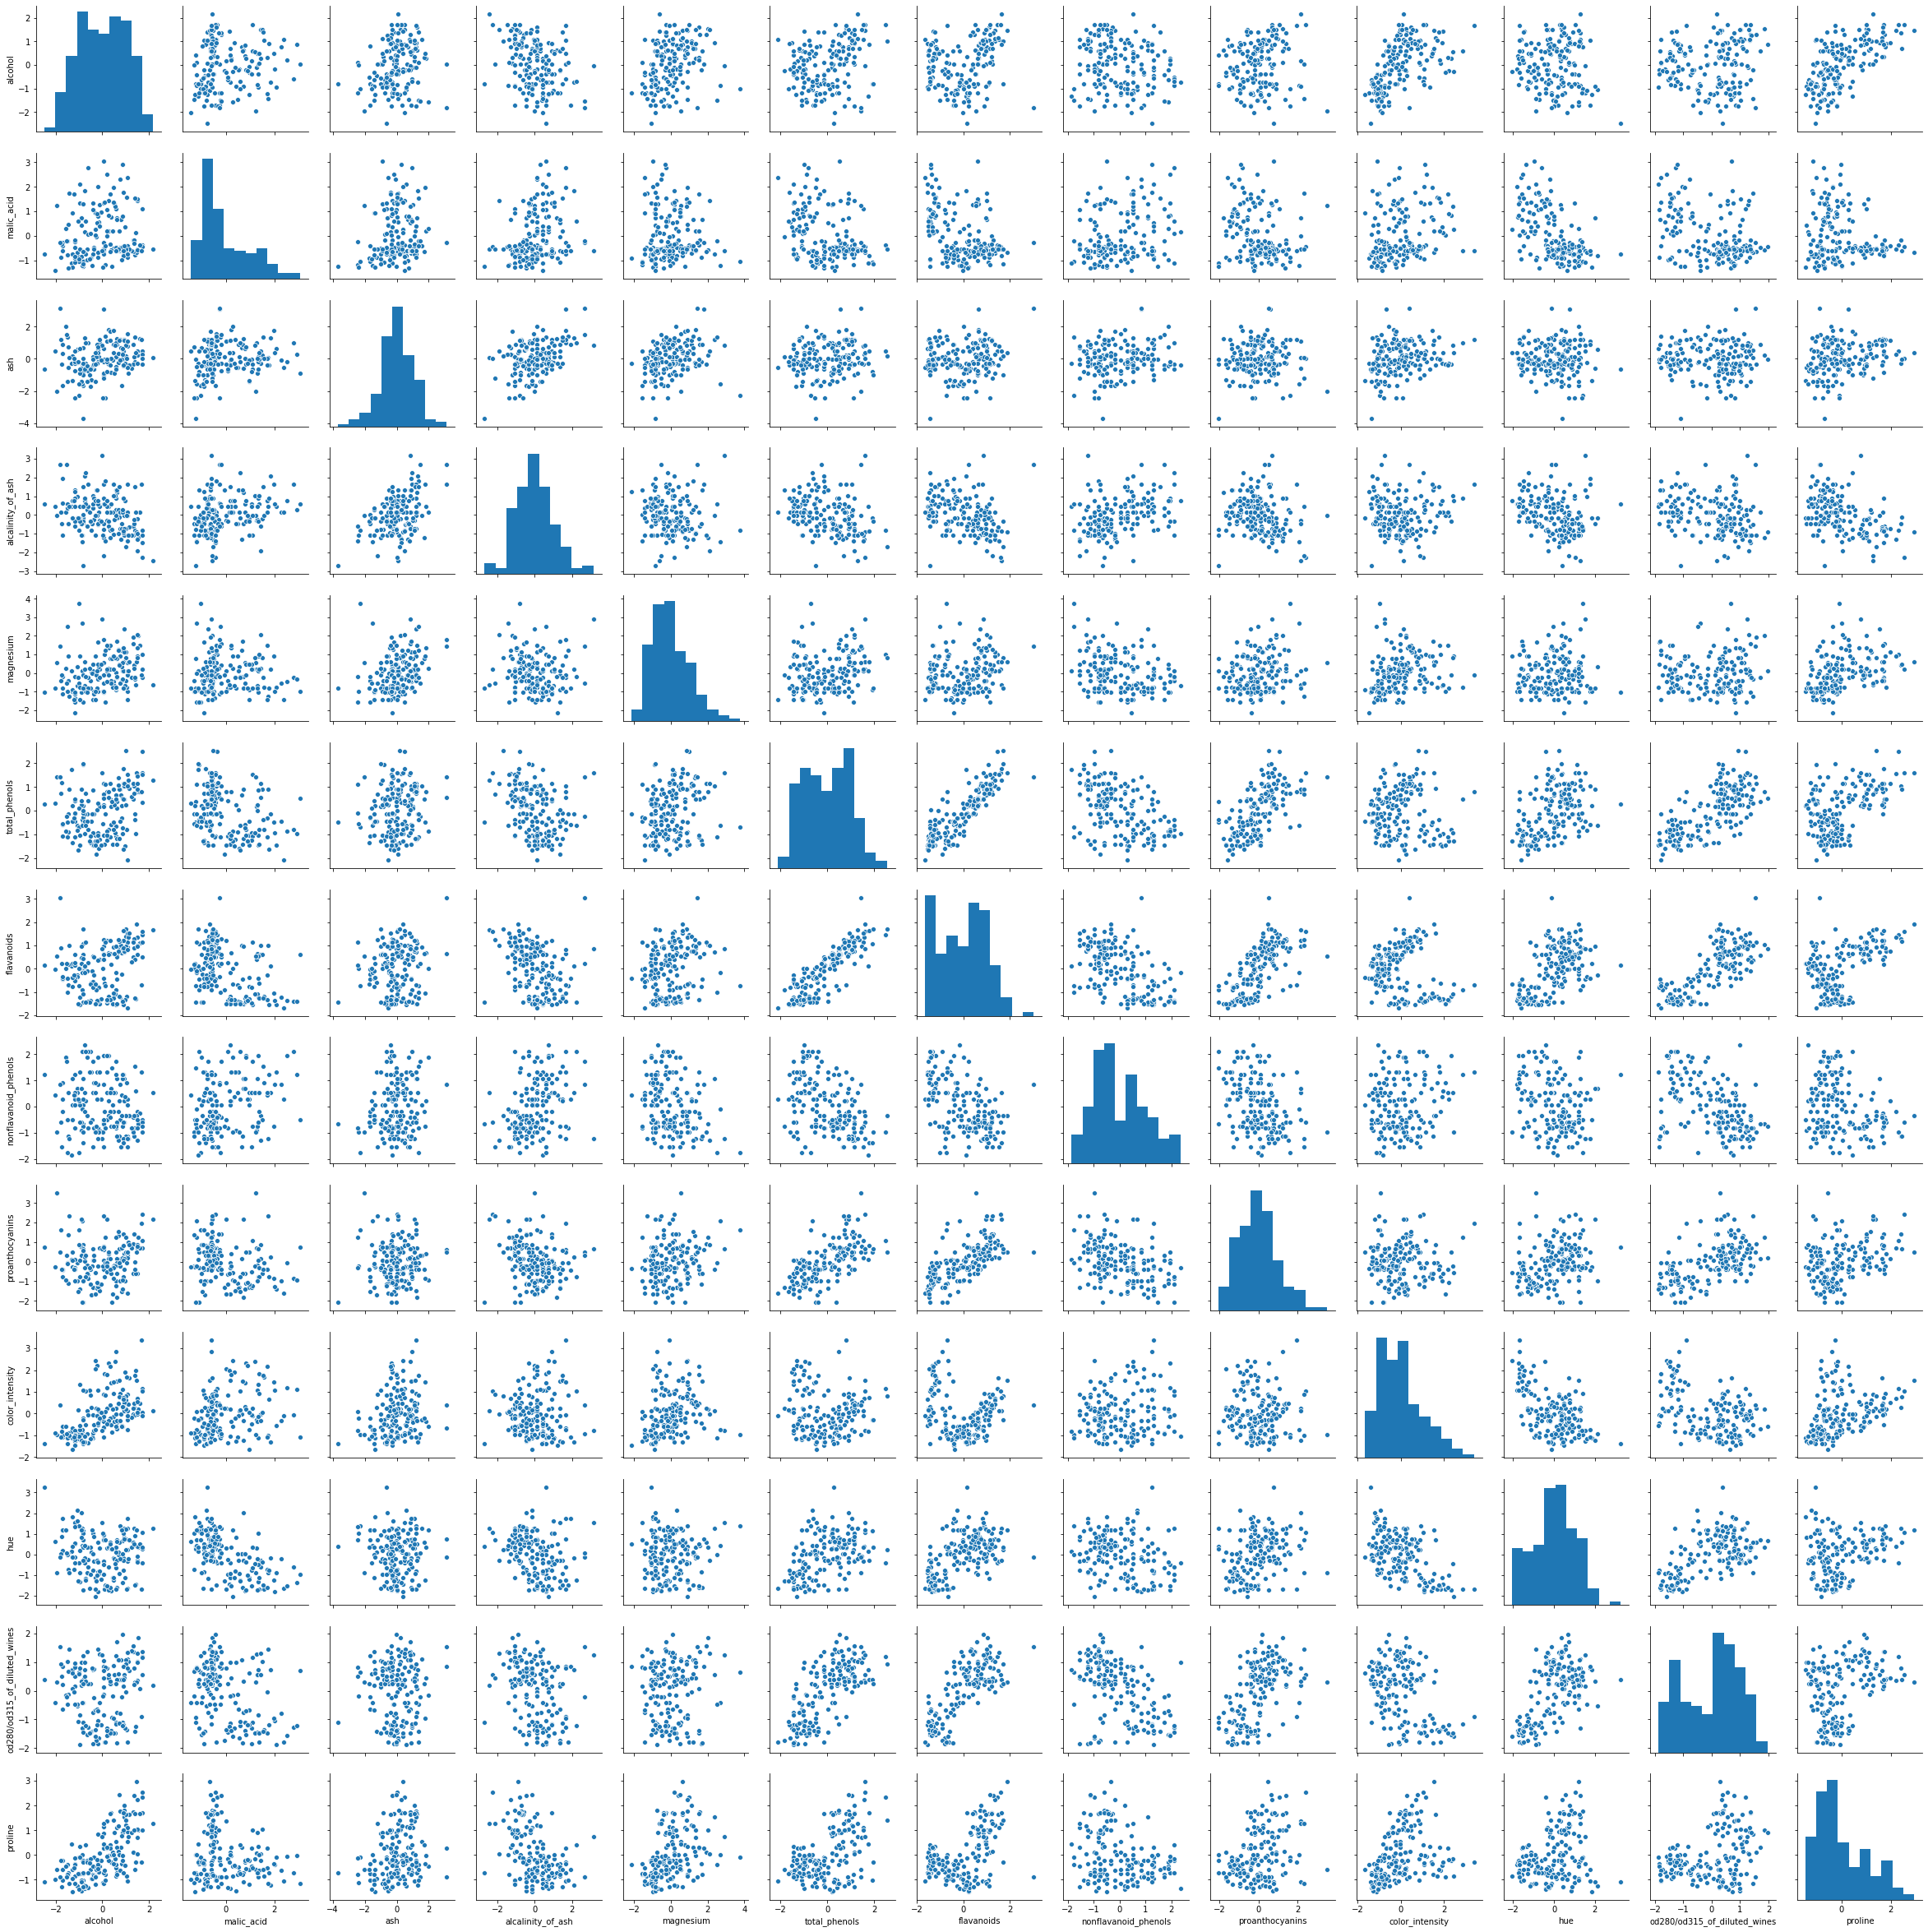

In [24]:
sns.pairplot(df_sc_sp)

- 컬럼에 대한 선정 기준을 정해야 한다.
- 모든 컬럼을 다 넣어서 비지도학습을 하는 건 차원의주 저주가 정확하게 적용되는 것

- 엘보우점수
- 군집에대하서 거리기반으로 평가하는 것

In [26]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    

In [27]:
n_clusters = [2,3,4,5,6,7,8]

1588.220143510189
1218.002895939455
1126.616098380644
1060.1910907094657
1002.2476888466654
941.9247276883214
893.8290535619612


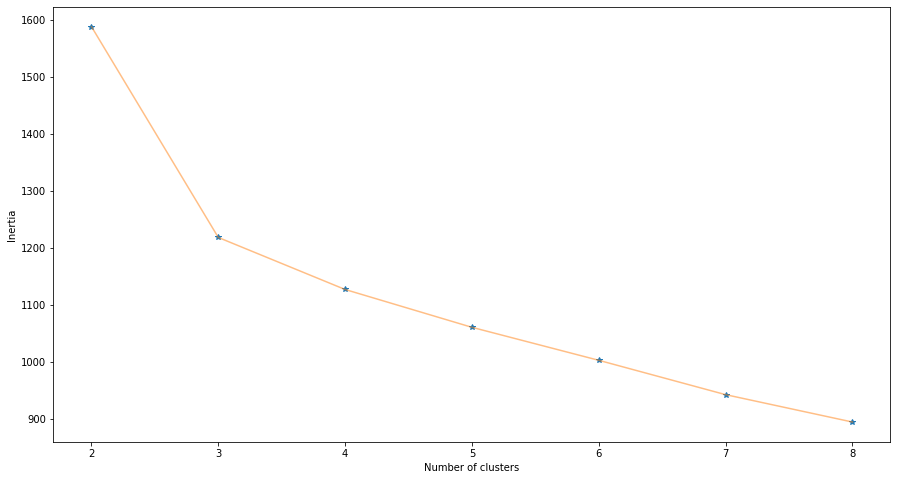

In [29]:
change_n_clusters(n_clusters, df_scaled)

- 이 엘보우 포인트만 보면 애매한 부분 있다. 3번째인가? 4번째일 수 있고
- 학습을 위한 데이터라 정말 예쁘게 엘보우가 나왔다.
- 추가적인 평가할 수 있는 실루엣 계수를 뽑는 것 

### 필수과제1
- kmeans의 군집화의 inertia의 값이 의미하는 것이 어떤 것인지?
- 구체적으로 개념 정리하고, 실제 시각화 코드를 통해서 인사이트를 도출해 보기!

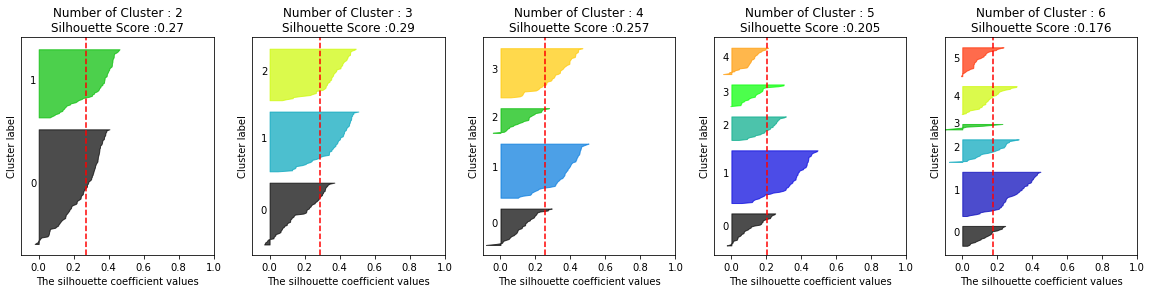

In [32]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6], df_scaled)

- 기본적으로 실루엣 스코어에 대한 지표를 확인하고 점수가 높을수록 군집이 잘 되어 있다는 뜻
- 실루엣스코어만 보고 판단하기에는 각 군집에 대한 실루엣 계수와 분포도 잘 봐야ㅑ 한다.

- 실루엣 분석이란 건 결국 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나내는 것
- 효율적으로 잘 분리되어 있다는 뜻은 다른 군집과의 거리는 멀리 떨어져 있고, 나의 군집내에서의 거리는 가깝게 잘 뭉쳐져 있다라는 뜻
- 군집화가 잘 되어 있다는 뜻은 군집마다 잘 뭉쳐져 있는 클러스터링이 되어 있다는 뜻, 다른 군집과 비교했을 때 잘 눈으로 보여지는 것 

In [33]:
df_scaled

array([[ 1.52631422, -0.57089554,  0.20782113, ...,  0.35811132,
         1.85100599,  1.00875071],
       [ 0.18121398,  0.00419091,  1.0807975 , ...,  0.31483426,
         0.79757125,  1.38822501],
       [ 1.70230865, -0.35855593,  0.46243924, ..., -0.4208757 ,
         1.19085355,  2.32109935],
       ...,
       [ 0.31949531,  1.70290782, -0.41053713, ..., -1.58935623,
        -1.46380198,  0.28142495],
       [ 0.19378501,  0.20768304, -0.01042296, ..., -1.54607917,
        -1.3795272 ,  0.29723638],
       [ 1.40060392,  1.54365311,  1.33541561, ..., -1.50280212,
        -1.4076188 , -0.58820367]])

In [41]:
kmeans = KMeans(n_clusters=3, random_state=111)
clusters = kmeans.fit(df_scaled)


AttributeError: 'KMeans' object has no attribute 'lables_'

In [42]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [44]:
df_sc_sp['cluster'] = clusters.labels_

In [45]:
df_sc_sp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.52631422,-0.57089554,0.20782113,-1.19769648,2.01151122,0.81544853,1.03169609,-0.66103228,1.25092179,0.22015342,0.35811132,1.85100599,1.00875071,1
1,0.18121398,0.00419091,1.08079750,-0.29067213,0.11072931,0.81544853,1.21048004,-0.50249579,2.17042222,0.23737493,0.31483426,0.79757125,1.38822501,1
2,1.70230865,-0.35855593,0.46243924,-0.83488674,0.98801327,2.49296666,1.45879109,-0.97810527,1.05641209,1.15011528,-0.42087570,1.19085355,2.32109935,1
3,0.28178222,0.20768304,1.80827782,0.43494735,1.35354825,0.81544853,0.66419574,0.21091843,0.41983488,-0.34815661,0.35811132,0.46047214,-0.03480364,1
4,1.48860113,-0.52665812,0.28056916,-1.31863306,0.91490627,1.56633760,1.35946667,-0.18542280,0.68507538,0.69805049,0.40138837,0.34810576,2.22623077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.87262064,2.91501312,0.28056916,0.28377662,-0.32791267,-0.97390415,-1.40175215,1.24140564,-0.92405036,1.10706149,-1.37297095,-1.21097765,-0.01899221,2
167,0.48291870,1.37555092,0.38969121,1.03963025,0.18383631,-0.78218779,-1.26269797,0.52799142,-0.30515584,0.93484633,-1.11330861,-1.46380198,0.01263065,2
168,0.31949531,1.70290782,-0.41053713,0.13260590,1.49976225,-1.11769142,-1.32229262,0.52799142,-0.41125204,2.18340624,-1.58935623,-1.46380198,0.28142495,2
169,0.19378501,0.20768304,-0.01042296,0.13260590,1.49976225,-1.02183324,-1.33222506,1.32067389,-0.21674234,1.79592213,-1.54607917,-1.37952720,0.29723638,2


### 군집별로 시각화를 어떻게 할 것인가?

- 차원축소의 개념
- pca 두 개의 축으로 나눠서 가장 데이터 특성을 나타내는 변수로 차원을 축소하는 것

In [46]:
df_sc_sp.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'cluster'],
      dtype='object')

- pca 주성분에 대한 값을 확인해야 하지만
- 지금은 kmeans에 학습을 위해서 일단은 2차원으로 축소를 하여서 그래프를 그려보겠음!

In [47]:
from sklearn.decomposition import PCA

In [48]:
df_scaled

array([[ 1.52631422, -0.57089554,  0.20782113, ...,  0.35811132,
         1.85100599,  1.00875071],
       [ 0.18121398,  0.00419091,  1.0807975 , ...,  0.31483426,
         0.79757125,  1.38822501],
       [ 1.70230865, -0.35855593,  0.46243924, ..., -0.4208757 ,
         1.19085355,  2.32109935],
       ...,
       [ 0.31949531,  1.70290782, -0.41053713, ..., -1.58935623,
        -1.46380198,  0.28142495],
       [ 0.19378501,  0.20768304, -0.01042296, ..., -1.54607917,
        -1.3795272 ,  0.29723638],
       [ 1.40060392,  1.54365311,  1.33541561, ..., -1.50280212,
        -1.4076188 , -0.58820367]])

In [50]:
X = df_scaled.copy()

# PCA 적용
pca = PCA(n_components = 2)
pca.fit(X)

x_pca = pca.transform(X)
x_pca

array([[ 3.35515902, -1.45980198],
       [ 2.5582972 , -0.96667468],
       [ 3.79940306, -2.72492275],
       [ 1.06189271, -0.87291302],
       [ 3.08438269, -2.08632629],
       [ 2.47898664, -1.11395313],
       [ 2.09514994, -1.61401437],
       [ 2.77120098, -0.73926074],
       [ 3.50243604, -1.24965769],
       [ 1.76950829, -0.55694   ],
       [ 2.13114742, -0.59364777],
       [ 3.49002537, -1.03844615],
       [ 4.34297405, -2.01427422],
       [ 2.33284376, -1.62569353],
       [ 2.22014783, -2.31951624],
       [ 1.93877178, -1.61334418],
       [ 3.56822907, -2.45545721],
       [ 2.1152579 , -1.05748031],
       [ 3.1534477 , -0.81285406],
       [ 1.12499547, -0.2005749 ],
       [ 2.55298694,  0.12691561],
       [ 1.65943159,  0.56464896],
       [ 1.78718411,  0.35744389],
       [ 1.05509634, -0.95428208],
       [ 1.80178533, -0.62229569],
       [ 1.24448388,  0.13807472],
       [ 2.22688017, -0.66010352],
       [ 2.27707453, -0.14672188],
       [ 2.53733913,

In [51]:
pca_df = pd.DataFrame(x_pca)


In [53]:
df_sc_sp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.52631422,-0.57089554,0.20782113,-1.19769648,2.01151122,0.81544853,1.03169609,-0.66103228,1.25092179,0.22015342,0.35811132,1.85100599,1.00875071,1
1,0.18121398,0.00419091,1.08079750,-0.29067213,0.11072931,0.81544853,1.21048004,-0.50249579,2.17042222,0.23737493,0.31483426,0.79757125,1.38822501,1
2,1.70230865,-0.35855593,0.46243924,-0.83488674,0.98801327,2.49296666,1.45879109,-0.97810527,1.05641209,1.15011528,-0.42087570,1.19085355,2.32109935,1
3,0.28178222,0.20768304,1.80827782,0.43494735,1.35354825,0.81544853,0.66419574,0.21091843,0.41983488,-0.34815661,0.35811132,0.46047214,-0.03480364,1
4,1.48860113,-0.52665812,0.28056916,-1.31863306,0.91490627,1.56633760,1.35946667,-0.18542280,0.68507538,0.69805049,0.40138837,0.34810576,2.22623077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.87262064,2.91501312,0.28056916,0.28377662,-0.32791267,-0.97390415,-1.40175215,1.24140564,-0.92405036,1.10706149,-1.37297095,-1.21097765,-0.01899221,2
167,0.48291870,1.37555092,0.38969121,1.03963025,0.18383631,-0.78218779,-1.26269797,0.52799142,-0.30515584,0.93484633,-1.11330861,-1.46380198,0.01263065,2
168,0.31949531,1.70290782,-0.41053713,0.13260590,1.49976225,-1.11769142,-1.32229262,0.52799142,-0.41125204,2.18340624,-1.58935623,-1.46380198,0.28142495,2
169,0.19378501,0.20768304,-0.01042296,0.13260590,1.49976225,-1.02183324,-1.33222506,1.32067389,-0.21674234,1.79592213,-1.54607917,-1.37952720,0.29723638,2


In [54]:
pca_df['cluster'] =df_sc_sp['cluster']

In [55]:
pca_df

,0,1,cluster
0,3.35515902,-1.45980198,1
1,2.55829720,-0.96667468,1
2,3.79940306,-2.72492275,1
3,1.06189271,-0.87291302,1
4,3.08438269,-2.08632629,1
...,...,...,...
166,-3.29636758,-2.16620107,2
167,-2.53655686,-1.73232680,2
168,-2.60965886,-2.76706515,2
169,-2.31911640,-2.30863167,2


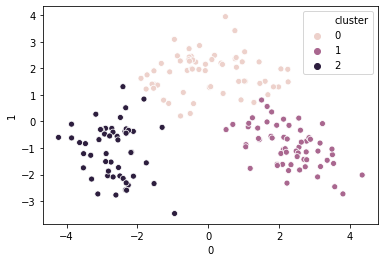

In [59]:
axs = plt.subplots()
axs = sns.scatterplot(0,1, hue='cluster',data=pca_df)

### 필수과제 2
- NH고객데이터의 군집에 대한 평가를 진행 후 적정 군집에 대한 기준을 선정해 주세요.(필수)
- 모든 변수를 다 사용해도 되고, 피처에대한 중요성을 확인해서 변수를 먼저 추출하고 난 후에 진행도 됩니다. ( 피처에 대한 중요도는 자율로 진행해 주세요! )
- 오늘 배운 군집화를 진행하는 과정에서의 근기들은 꼭 다 코드로 작성 해주셔야 합니다.(필수)

- 필수적으로 공유해야 하는 것 (필수)
- 1. 군집의 개수를 선정한 기준에 대한 설명 및 코드 ( 주석 필수 )
- 2. 해당 군집에 대한 특성 비교 
- 3. 군집에 대한 인사이트를 통해서 마케팅이건, 세일즈건 어떤 전략을 펼칠 수 있는지? 
- ( 단순하게 나열 형식으로 투자성향이 높은 사람은 무엇을 해야 한다 이런 식보다는 좀 더 데이터 근거 + 외부나 비정형데이터를 통해서 같이 전략을 제안하는 것) 

- 과제에 대한 제출 가이드
- 복습과제는 동일해요 예외가 없습니다. 동일한 기준
- 필수과제는 시험기간이기 때문에 시험 기간 끝나고 휴회기간 후 첫 수업하는 날까지 올려주시면 된다.